<a href="https://colab.research.google.com/github/jerica-tripp/StockPrediction_UsingProphet/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get & Clean Data

In [175]:
# Import Packages
import requests
import pandas as pd
from fbprophet import Prophet
import time

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [176]:
# Import data from Alpha Advantage for selected stock
# Add 30 second delay to prevent reaching API limit of 5 calls per minute

# Create list of stock tickers to loop over
tickers = ['DFS','JPM','AXP','C','BAC','USB','WFC']

# Create URL for AlphaVantage API call
apiKey = 'MH7YI4PH913XPSUP'
func = 'TIME_SERIES_DAILY'

#Create empty dataframe to store results of all tickers
df = pd.DataFrame()

# Loop over tickers and concatenate results to dataframe
for i in tickers:
  # Create empty dataframe to store results of loop
  df_tmp = pd.DataFrame()
  df_temp = pd.read_csv('https://www.alphavantage.co/query?function='+func+'&symbol='+i+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
) 
  df_temp['ticker'] = i
  df = pd.concat([df, df_temp], axis=0)

  # Wait 30 seconds before next running loop
  time.sleep(30)

In [177]:
# View data sample
df.head()

,timestamp,open,high,low,close,volume,ticker
0,2022-07-15,102.11000,104.01000,100.60000,104.01000,2339729,DFS
1,2022-07-14,97.32000,99.78000,96.60000,99.31000,1851194,DFS
2,2022-07-13,97.95000,100.33000,96.14000,99.66000,1746567,DFS
3,2022-07-12,97.41000,101.22000,97.41000,99.83000,1827591,DFS
4,2022-07-11,98.95000,100.90000,98.87000,99.50000,1385874,DFS


In [178]:
# View data shape
df.shape

(38077, 7)

In [179]:
# Verify all data has been selected
df['ticker'].value_counts()

JPM    5713
AXP    5713
C      5713
BAC    5713
USB    5713
WFC    5713
DFS    3799
Name: ticker, dtype: int64

In [180]:
# Check date ranges of selected tickers
for i in tickers:
  print(i)
  tmp = df[df.ticker==i]
  print('Minimum Date in Data '+str(min(tmp['timestamp'])))
  print('Maximum Date in Data '+str(max(tmp['timestamp'])))

DFS
Minimum Date in Data 2007-06-14
Maximum Date in Data 2022-07-15
JPM
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15
AXP
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15
C
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15
BAC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15
USB
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15
WFC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-15


In [182]:
# Write data to CSV for use later
df.to_csv('stock_data.csv')

In [183]:
# Check Format of date field
df['timestamp'].dtype

dtype('O')

In [184]:
# Convert timestamp to datetime data type
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')

In [185]:
# Check Format of date field after change
df['timestamp'].dtype


dtype('<M8[ns]')

In [186]:
# Check output of changed date field
df['timestamp']

0      2022-07-15
1      2022-07-14
2      2022-07-13
3      2022-07-12
4      2022-07-11
          ...    
5708   1999-11-05
5709   1999-11-04
5710   1999-11-03
5711   1999-11-02
5712   1999-11-01
Name: timestamp, Length: 38077, dtype: datetime64[ns]

In [187]:
# Create dataframe to analyze close value
df = df[['ticker','close','timestamp']]

# View Stats of Data 

In [188]:
# View statistical details of all tickers

# Initialize DataFrame with statistics on closing column for all stock
df_desc = df.describe()
df_desc.rename(columns={'close':'all'},inplace = True)

# Add columns to DataFrame with statistics on closing column for each stock
for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n_desc = df_n.describe()
  df_n_desc.rename(columns={'close':i},inplace = True)
  df_desc = pd.concat([df_desc, df_n_desc], axis=1)

print("Closing Stock Price Summary Statistics")  
df_desc

Closing Stock Price Summary Statistics


,all,DFS,JPM,AXP,C,BAC,USB,WFC
count,38077.00000,3799.00000,5713.00000,5713.00000,5713.00000,5713.00000,5713.00000,5713.00000
mean,49.10671,51.71999,62.90157,71.33310,45.08359,34.45541,35.15417,43.97464
std,28.50971,30.31138,34.99001,36.92384,18.98222,20.87757,11.86568,11.90120
min,1.02000,4.89000,15.45000,10.26000,1.02000,3.14000,8.82000,8.12000
25%,30.94000,23.35000,38.48000,45.79000,37.93000,15.75000,25.02000,33.75000
50%,45.80000,54.24000,47.34000,57.67000,48.26000,29.90000,32.43000,46.27000
75%,57.72000,70.51000,83.69000,89.66000,54.88000,48.28000,43.62000,53.19000
max,198.38000,135.38000,171.78000,198.38000,81.91000,89.01000,63.25000,73.00000


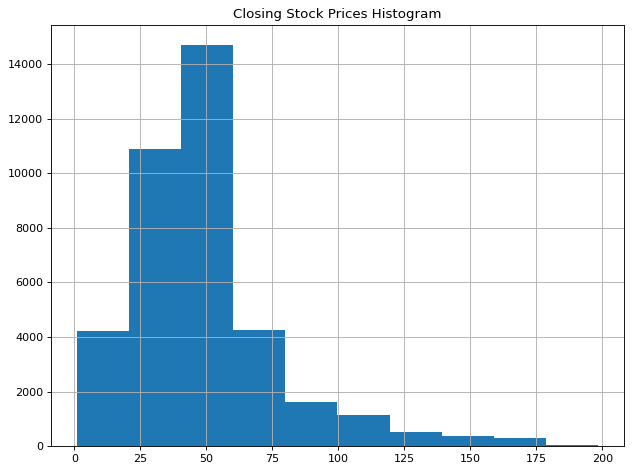

In [189]:
# View Histogram of Data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['close'].hist()
plt.title('Closing Stock Prices Histogram')
plt.tight_layout()
plt.show()

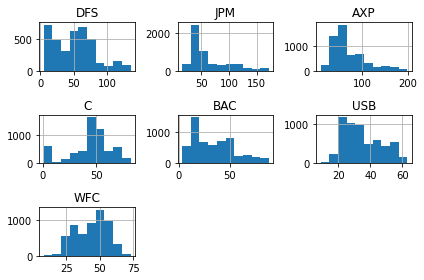

In [190]:
# View histogram for each stock
n=1
for i in tickers:
  df_n = df[(df.ticker==i)]
  plt.subplot(3,3,n)
  df_n['close'].hist()
  plt.title(i)
  plt.tight_layout()
  n=n+1

plt.show()

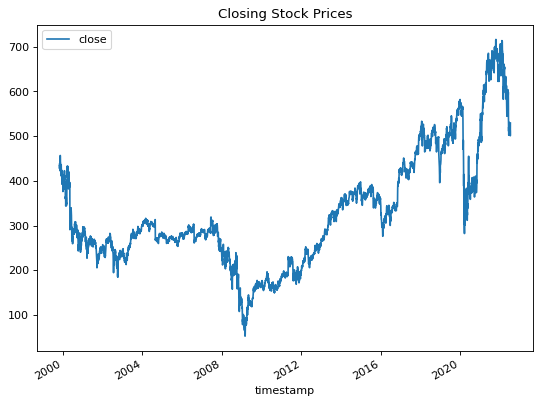

In [191]:
# Plot closing prices for all stocks over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()
df_sum = df.groupby(['timestamp']).sum()
df_sum = df_sum.reset_index()

df_sum.plot(kind='line',x='timestamp',y='close', ax=ax, title='Closing Stock Prices')


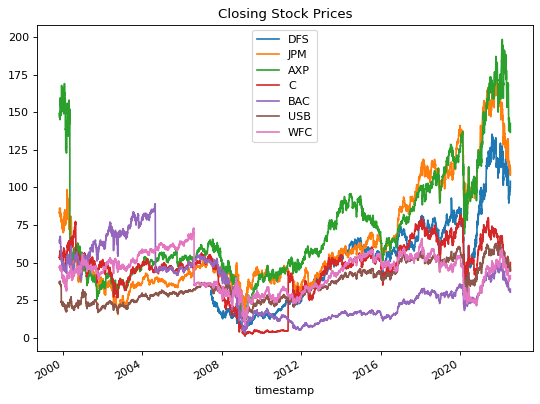

In [192]:
# Plot closing prices for each stock over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()

for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n.plot(kind='line',x='timestamp',y='close',label=i, ax=ax, title='Closing Stock Prices')

plt.legend(tickers)

# Model 

In [193]:
df.head()

,ticker,close,timestamp
0,DFS,104.01000,2022-07-15
1,DFS,99.31000,2022-07-14
2,DFS,99.66000,2022-07-13
3,DFS,99.83000,2022-07-12
4,DFS,99.50000,2022-07-11


In [194]:
# Make dataframe for each stock for model
d = {}
for i in tickers:
  d[i] = df[(df.ticker==i)]
  d[i] = d[i][['timestamp','close']]
  d[i].columns = ['ds','y']


In [165]:
exclusion_dates = pd.date_range(start='2020-01-01', end='2021-04-01')

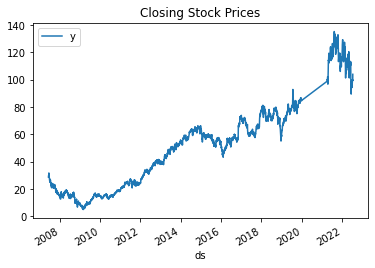

In [195]:
df_n = d['DFS'].loc[(~d['DFS'].ds.isin(exclusion_dates))]
df_n.plot(kind='line',x='ds',y='y', title='Closing Stock Prices')


In [207]:
# Split data into train and test

from statsmodels.tools.eval_measures import rmse

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

def stock_pred(data, iterations):
  test_len = iterations
  df_test = data[:test_len]
  df_train = data[test_len:]
  
  print("**********Stock: "+ i +"**********")
  print("----Training Data ----")
  print("Training data size: "+str(len(df_train)))
  print("Training Min Date: "+str(min(df_train['ds'])))
  print("Training Max Date: "+str(max(df_train['ds'])))

  print("""
  ----Testing Data ----""")
  df_test_min = min(df_test['ds'])
  df_test_max = max(df_test['ds'])
  print("Testing data size: "+str(len(df_test)))
  print("Testing Min Date: "+str(df_test_min))
  print("Testing Max Date: "+str(df_test_max))


  ##### Model

  m = Prophet(
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_mode="multiplicative"
    ).add_seasonality(
      name='monthly',
      period=30.5,
      fourier_order=5
    ).add_seasonality(
      name='quarterly',
      period=365.25/4,
      fourier_order=5,
      prior_scale=15)
  m.add_country_holidays(country_name='US') 
  m.fit(df_train)

  # Create dataframe with the dates we want to predict
  future = m.make_future_dataframe(periods=120, freq='D')

  # Eliminate weekends from the future dataframe
  future['day'] = future['ds'].dt.weekday
  future = future[future['day']<=4]

  forecast=m.predict(future)

  # Plotting
  m.plot(forecast, uncertainty=True)
  plt.show()

  ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
  df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=(df_test_min,df_test_max))
  plt.show()

  y_pred = forecast.iloc[-iterations:]['yhat']
  y_true = df_test['y']

  ## Scoring Model
  print("RMSE: "+str(rmse(y_pred, y_true)))
  print('MAPE: '+str(mean_absolute_percentage_error(y_pred, y_true)))



**********Stock: DFS**********
----Training Data ----
Training data size: 3729
Training Min Date: 2007-06-14 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


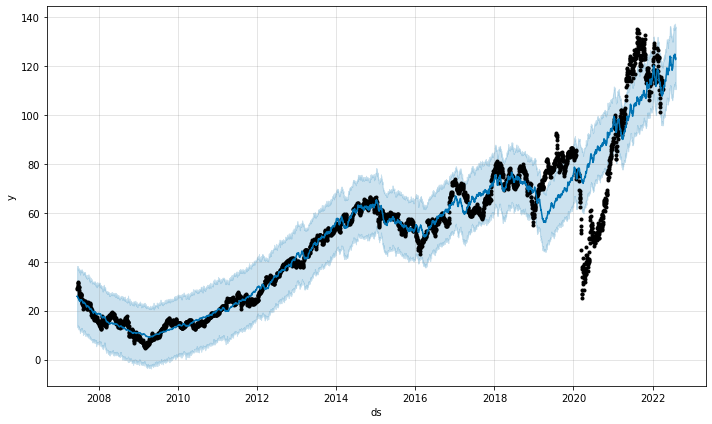

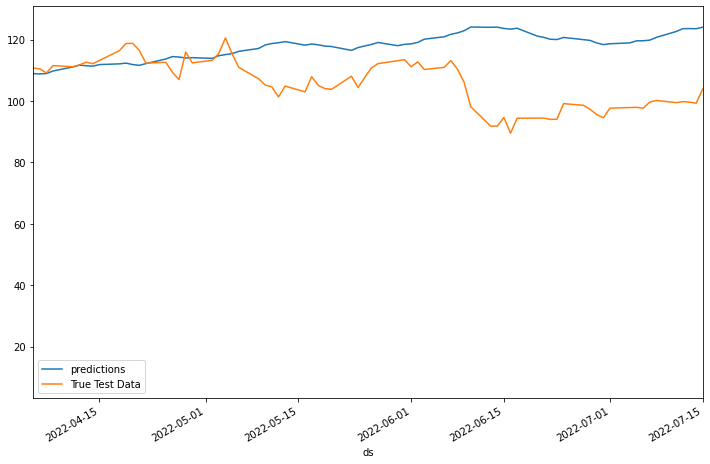

RMSE: 15.69485487425837
MAPE: 0.12085148571536106
**********Stock: JPM**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


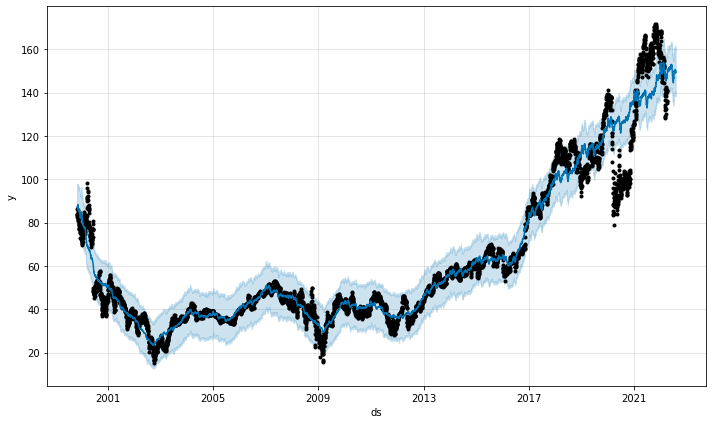

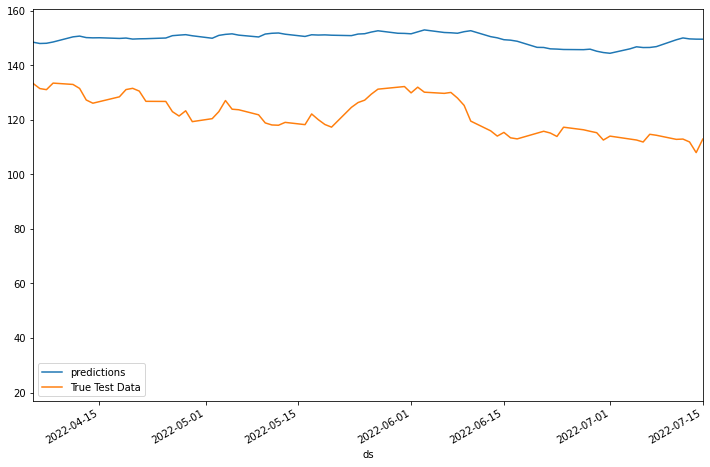

RMSE: 28.79208090388702
MAPE: 0.18556629907703273
**********Stock: AXP**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


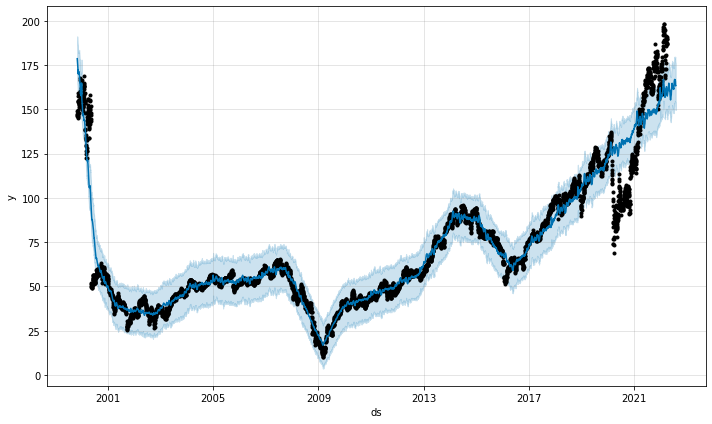

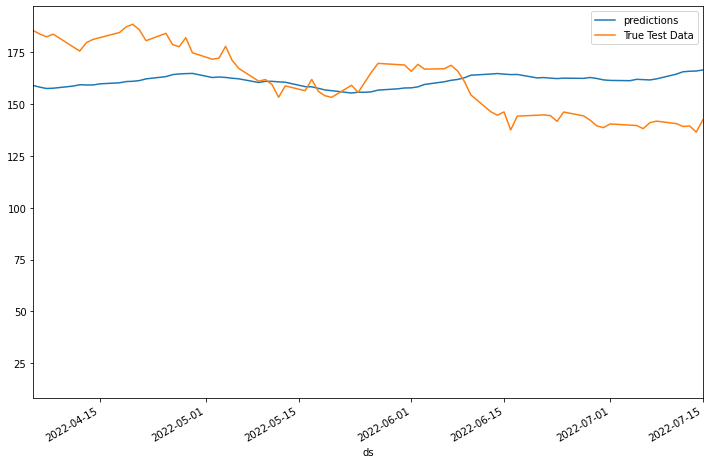

RMSE: 14.528386319873581
MAPE: 0.07847854696494878
**********Stock: C**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


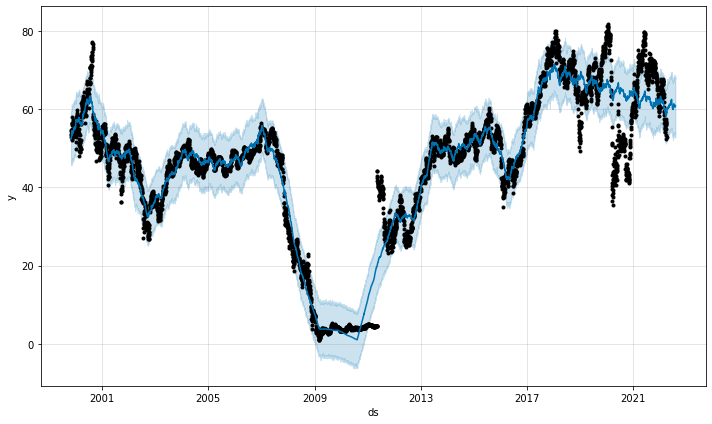

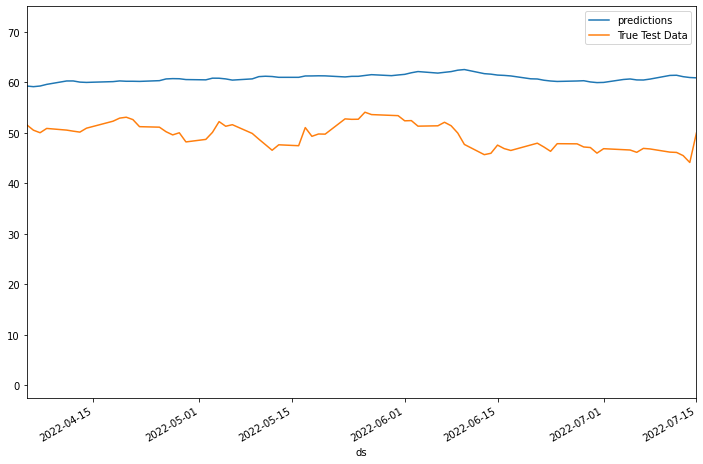

RMSE: 11.799988341662594
MAPE: 0.18966689510827425
**********Stock: BAC**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


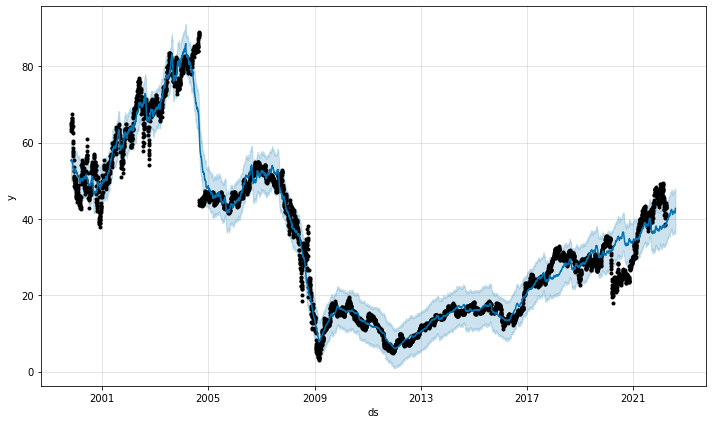

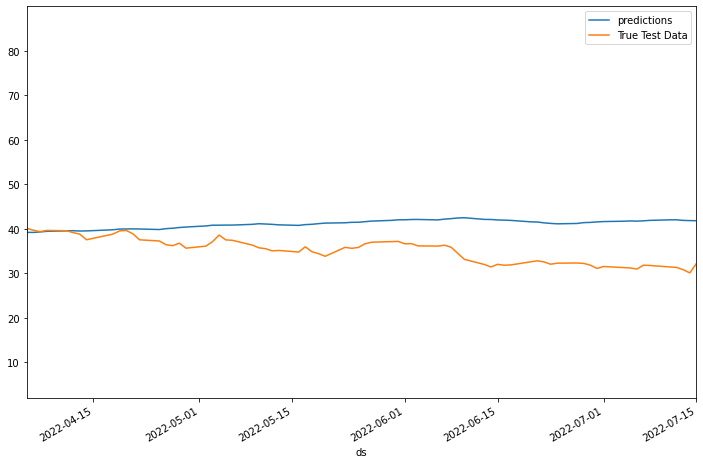

RMSE: 6.849956261806956
MAPE: 0.15438451569464656
**********Stock: USB**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


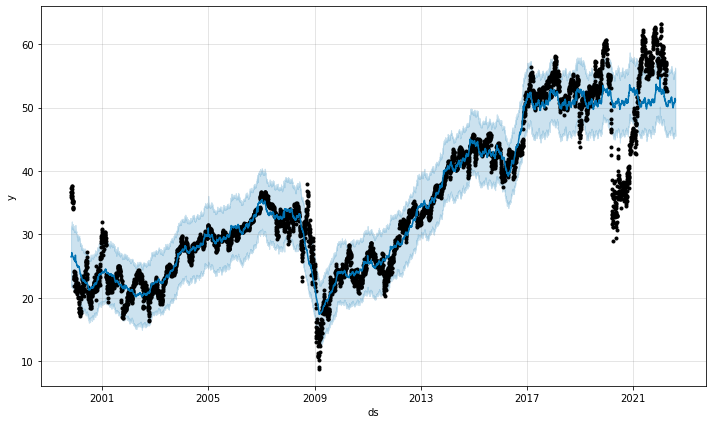

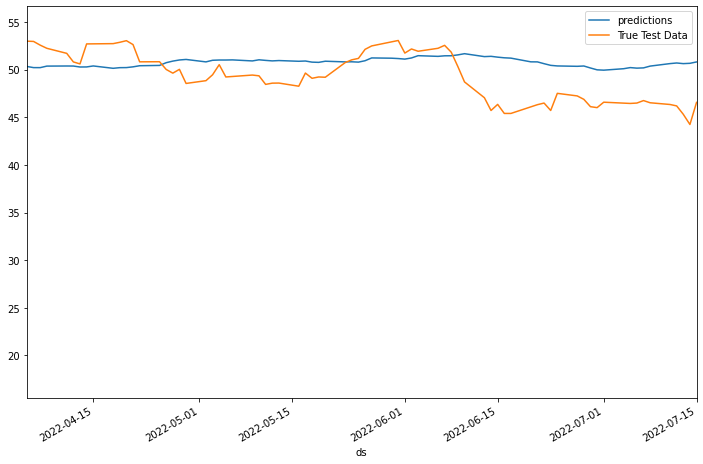

RMSE: 2.91929606175699
MAPE: 0.04490300246234831
**********Stock: WFC**********
----Training Data ----
Training data size: 5643
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-04-04 00:00:00

  ----Testing Data ----
Testing data size: 70
Testing Min Date: 2022-04-05 00:00:00
Testing Max Date: 2022-07-15 00:00:00


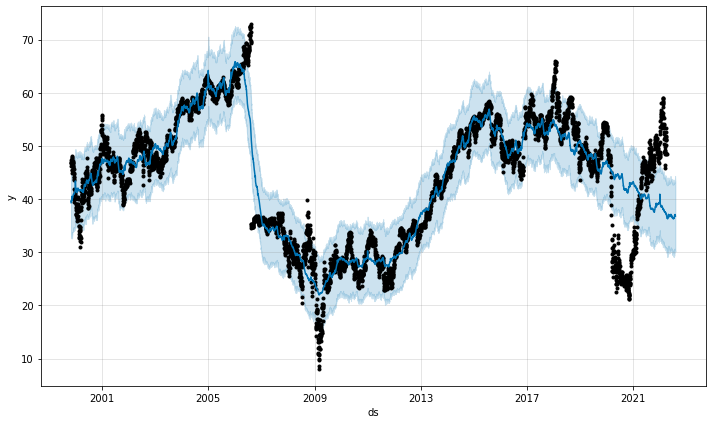

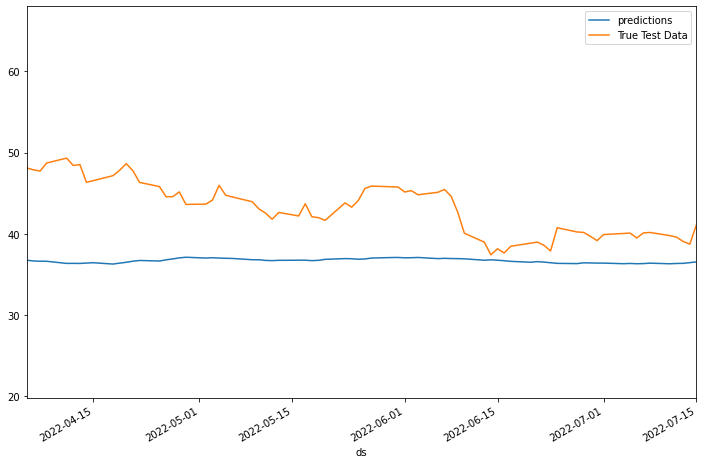

RMSE: 7.233770806848132
MAPE: 0.17473437211306492


In [208]:
for i in d:
  stock_pred(d[i],70)